In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats 
from scipy import stats

In [5]:
team = pd.read_csv("Team Data 2019 - Sheet1.csv")
opp = pd.read_csv("Opponent Data 2019 - Sheet1.csv")

I wanted to know which team stats correlate the most with winning percentage in the NBA. For this, I used the 2018-19 NBA season. The 2019-20 season had the lockout and bubble which could’ve skewed the data, the 2020-21 season was shortened, and the 2021-22 season is in progress. The 2018-19 season had the most games to work with and no global pandemic to possibly disrupt the data. To find these stats, I went to basketball-reference.com and gathered all the team stats for that season and put it into a csv file. I also did the same for teams’ opponents’ stats to see if there was also a correlation.

In [28]:
team_cor = team.corr()
team_cor

,W/L%,FG,FG%,3P,3P%,2P,2P%,FT,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
W/L%,1.000000,0.526213,0.610524,0.484206,0.541594,0.068675,0.600812,0.129135,0.160529,0.079461,0.574832,0.529102,0.502158,0.102789,0.444784,-0.247065,-0.160389,0.660668
FG,0.526213,1.000000,0.823462,0.064445,0.402498,0.722956,0.558281,-0.054891,0.069958,0.145195,0.551955,0.540081,0.727866,0.217170,0.404850,0.003482,-0.089237,0.816435
FG%,0.610524,0.823462,1.000000,-0.024632,0.544866,0.649120,0.672242,0.020001,0.239741,-0.266449,0.514181,0.316327,0.786196,0.148078,0.479709,0.004674,-0.139680,0.670731
3P,0.484206,0.064445,-0.024632,1.000000,0.068783,-0.642867,0.553752,0.087494,0.035313,0.146456,0.166489,0.210644,0.096571,0.117374,0.210320,0.010740,0.132245,0.456556
3P%,0.541594,0.402498,0.544866,0.068783,1.000000,0.261326,0.045875,0.073897,0.418553,-0.152974,0.248013,0.141208,0.284361,-0.165131,0.053099,-0.370836,-0.180262,0.384126
2P,0.068675,0.722956,0.649120,-0.642867,0.261326,1.000000,0.045141,-0.102709,0.029250,0.010052,0.308400,0.268716,0.491831,0.085432,0.165140,-0.004763,-0.160053,0.310584
2P%,0.600812,0.558281,0.672242,0.553752,0.045875,0.045141,1.000000,0.084429,0.065956,-0.187478,0.440939,0.290341,0.625366,0.286007,0.558330,0.197324,0.032021,0.693879
FT,0.129135,-0.054891,0.020001,0.087494,0.073897,-0.102709,0.084429,1.000000,0.212964,0.046521,0.127892,0.131129,-0.153955,-0.118126,0.004738,0.172333,0.384182,0.401576
FT%,0.160529,0.069958,0.239741,0.035313,0.418553,0.029250,0.065956,0.212964,1.000000,-0.401457,-0.105912,-0.277355,-0.047603,-0.219481,-0.040631,-0.469637,-0.246996,0.158237
ORB,0.079461,0.145195,-0.266449,0.146456,-0.152974,0.010052,-0.187478,0.046521,-0.401457,1.000000,0.063742,0.519572,-0.036913,0.006602,-0.182434,0.153057,0.217163,0.191531


I also did the same for teams’ opponents’ stats to see if there was also a correlation.

In [29]:
opp_cor = opp.corr()
opp_cor

,Opp W/L %,Opp FG,Opp FG%,Opp 3P,Opp 3P%,Opp 2P,Opp 2P%,Opp FT,Opp ORB,Opp DRB,Opp TRB,Opp AST,Opp STL,Opp BLK,Opp TOV,Opp PF,Opp PTS
Opp W/L %,1.000000,-0.473974,-0.712889,-0.345275,-0.614545,-0.273024,-0.661462,-0.248621,-0.208462,-0.547963,-0.519577,-0.555097,-0.215686,-0.502460,-0.035586,0.018005,-0.541750
Opp FG,-0.473974,1.000000,0.679285,0.317011,0.413860,0.822672,0.610681,0.186778,0.475807,0.385565,0.539477,0.682630,0.286768,0.399616,-0.138642,0.160569,0.915452
Opp FG%,-0.712889,0.679285,1.000000,0.095032,0.527876,0.630945,0.939703,0.181789,0.164709,0.311112,0.319485,0.576421,0.138074,0.447103,0.042973,-0.009341,0.616226
Opp 3P,-0.345275,0.317011,0.095032,1.000000,0.633041,-0.278398,0.128909,-0.141789,0.266662,0.414690,0.450743,0.709264,-0.072281,0.226771,0.116520,-0.240226,0.415334
Opp 3P%,-0.614545,0.413860,0.527876,0.633041,1.000000,0.039649,0.327827,-0.098900,0.097796,0.244264,0.234184,0.583201,-0.026690,0.398313,0.051794,-0.176827,0.423290
Opp 2P,-0.273024,0.822672,0.630945,-0.278398,0.039649,1.000000,0.541164,0.274143,0.322002,0.141881,0.276136,0.266142,0.333737,0.268756,-0.210249,0.306608,0.678112
Opp 2P%,-0.661462,0.610681,0.939703,0.128909,0.327827,0.541164,1.000000,0.199759,0.181163,0.374332,0.375416,0.595924,0.117161,0.390645,0.103129,-0.042928,0.578287
Opp FT,-0.248621,0.186778,0.181789,-0.141789,-0.098900,0.274143,0.199759,1.000000,0.512680,0.140232,0.375644,0.142041,0.705321,0.113622,0.382743,0.489528,0.507728
Opp ORB,-0.208462,0.475807,0.164709,0.266662,0.097796,0.322002,0.181163,0.512680,1.000000,0.205888,0.682164,0.482377,0.339430,0.211294,0.390961,0.221124,0.629916
Opp DRB,-0.547963,0.385565,0.311112,0.414690,0.244264,0.141881,0.374332,0.140232,0.205888,1.000000,0.855983,0.425758,0.040337,0.280862,0.285248,-0.052795,0.446586


In Python, I created a correlation matrix for each file, team and opponent, and looked at any correlation with an absolute value above 0.5. I felt anything below that is a weak correlation and isn’t a primary focus on winning basketball games. I used absolute value because there are strong negative correlations, like points opponents score on the team, when it comes to winning. Strong negative correlations are strong correlations too.

Opponent's FG%
-0.712889


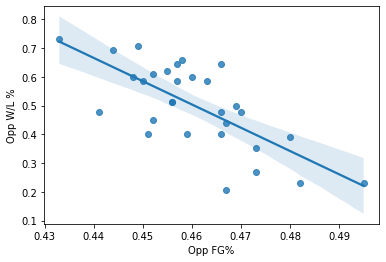

In [45]:
sns.regplot(x=opp["Opp FG%"],y=opp["Opp W/L %"])
print("Opponent's FG%")
print(-0.712889)

Opponent's 2P%
-0.661462


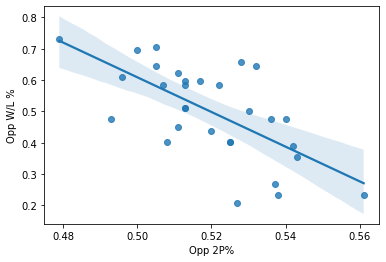

In [46]:
sns.regplot(x=opp["Opp 2P%"],y=opp["Opp W/L %"])
print("Opponent's 2P%")
print(-0.661462)

Team's Points
0.660668


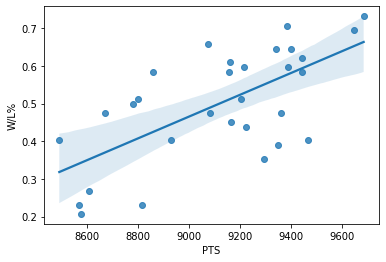

In [52]:
sns.regplot(x=team["PTS"],y=team["W/L%"])
print("Team's Points")
print(0.660668)

-0.614545


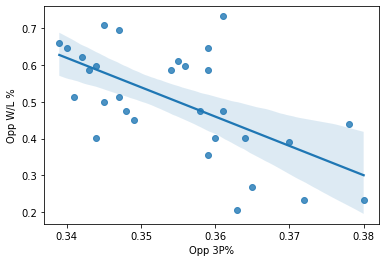

In [44]:
sns.regplot(x=opp["Opp 3P%"],y=opp["Opp W/L %"])
print("Opponent's 3P%")
print(-0.614545)

Team's FG%
0.610524


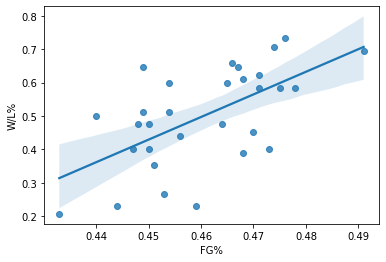

In [48]:
sns.regplot(x=team["FG%"],y=team["W/L%"])
print("Team's FG%")
print(0.610524)

Team's 2P%
0.600812


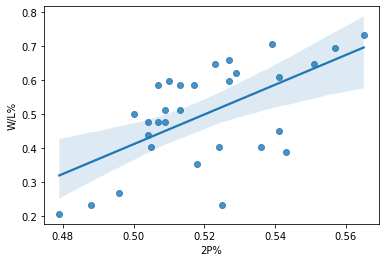

In [49]:
sns.regplot(x=team["2P%"],y=team["W/L%"])
print("Team's 2P%")
print(0.600812)

Team's Defensive Rebounds
0.574832


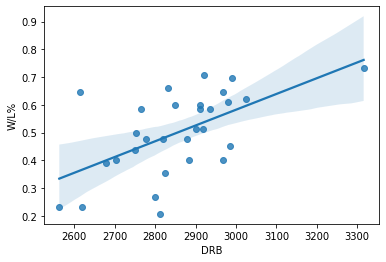

In [50]:
sns.regplot(x=team["DRB"],y=team["W/L%"])
print("Team's Defensive Rebounds")
print(0.574832)

Opponent's Assists
-0.555097


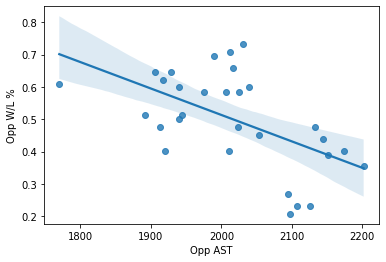

In [53]:
sns.regplot(x=opp["Opp AST"],y=opp["Opp W/L %"])
print("Opponent's Assists")
print(-0.555097)

Opponent's Defensive Rebounds
-0.547963


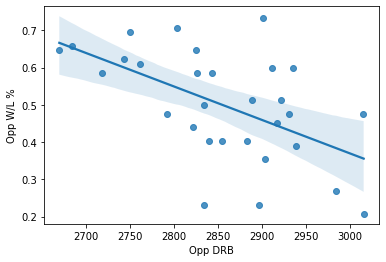

In [51]:
sns.regplot(x=opp["Opp DRB"],y=opp["Opp W/L %"])
print("Opponent's Defensive Rebounds")
print(-0.547963)

Opponent's Points
-0.54175


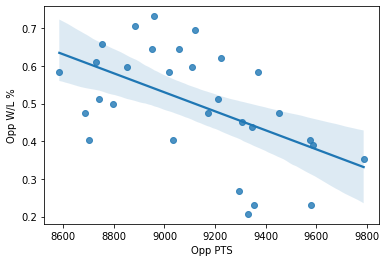

In [55]:
sns.regplot(x=opp["Opp PTS"],y=opp["Opp W/L %"])
print("Opponent's Points")
print(-0.541750)

Team's 3P%
0.541594


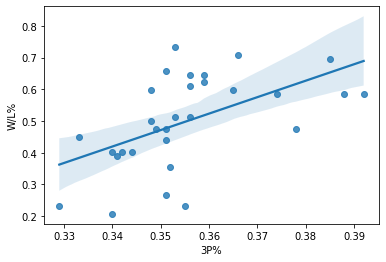

In [54]:
sns.regplot(x=team["3P%"],y=team["W/L%"])
print("Team's 3P%")
print(0.541594)

Team's Total Rebounds
0.529102


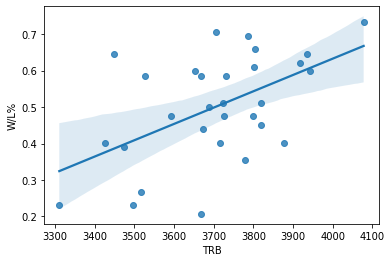

In [56]:
sns.regplot(x=team["TRB"],y=team["W/L%"])
print("Team's Total Rebounds")
print(0.529102)

Team's Total Field Goals
0.526213


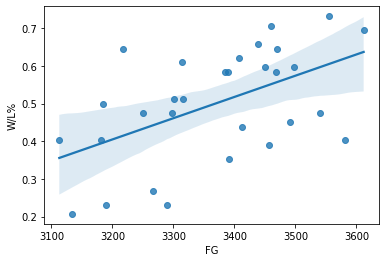

In [57]:
sns.regplot(x=team["FG"],y=team["W/L%"])
print("Team's Total Field Goals")
print(0.526213)

Opponent's Total Rebounds
-0.519577


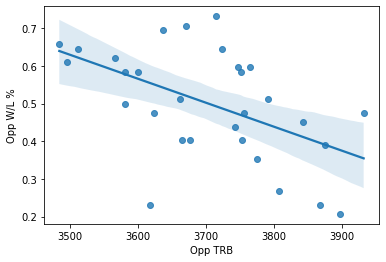

In [58]:
sns.regplot(x=opp["Opp TRB"],y=opp["Opp W/L %"])
print("Opponent's Total Rebounds")
print(-0.519577)

Team's Assists
0.502158


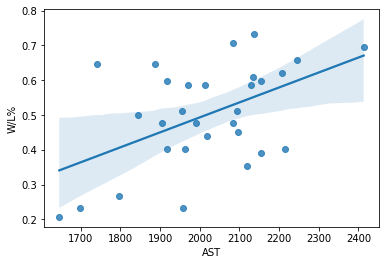

In [59]:
sns.regplot(x=team["AST"],y=team["W/L%"])
print("Team's Assists")
print(0.502158)

After running the data, the best predictors of win/loss% in order of their correlation coefficient are 

Opponent Field Goal % (-0.712889)

Opponent 2-Point % (-0.661462)

Team’s Points Scored (0.660668)

Opponent’s 3-Point % (-0.614545)

Team’s Field Goal % (0.610524)

Team’s 2-Point % (0.600812)

Team’s Defensive Rebounds (0.574832)

Opponent’s Assists (-0.555097)

Opponent’s Defensive Rebounds (-0.547963)

Opponent’s Points Scored (-0.541750)

Team’s 3-Point % (0.541594)

Team’s Total Rebounds (0.529102)

Team’s Total Field Goals (0.526213)

Opponent’s Total Rebounds (-0.519577)

Team’s Assists (0.502158)

I’d actually expected free throw attempts, fouls, and turnovers to be stronger correlations to winning than they are. More free throws, less fouls, more opponent fouls, less turnovers, and more opponent turnovers still correlate towards winning (more opponent free throws slightly do too which is the opposite of expected) yet much weaker than I’d anticipated. When it comes down to it, the most important stats in winning are FG%, 2-Point %, 3-Point %, Points Scored, Defensive and Total Rebounds, Made Field Goals, and Assists. And in the case of FG%, 2-Point %, 3-Point %, and Assists it’s actually slightly more important to prevent the opposing team from executing on those, than it is to execute on them yourself. 

Correlation does not equal causation. You don’t necessarily want to construct a team with outlying specialists of a few of these top areas for the sole purpose of prioritizing these statistics. That can come with huge opportunity costs and you could be stuck with some very one-dimensional players who can’t play as a team. When a measure becomes a target, it ceases to be a good measure. However, when constructing a basketball team and looking at players’ skills it is smart to make sure these bases are the ones covered first and foremost. All around players who can get stops, score from all over, pass, and rebound will do the trick.
